## 9 seconds(non-overlapping)

In [1]:
import numpy as np
import wfdb as wf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
#from keras.callbacks import Tensorboard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/9s_overlapping/train_data.npy")
trainL = np.load("/home/hsiehch/9s_overlapping/train_label.npy")
validationD = np.load("/home/hsiehch/9s_overlapping/validation_data.npy")
validationL = np.load("/home/hsiehch/9s_overlapping/validation_label.npy")
testD = np.load("/home/hsiehch/9s_overlapping/test_data.npy")
testL = np.load("/home/hsiehch/9s_overlapping/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

with tf.device('/cpu:0'):
    model = Sequential() 
    model.add(Conv1D(filters = 16, kernel_size = 32, strides=2, input_shape = (trainData.shape[1], 1), activation = "relu"))   
    model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
    model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
    model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
    model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
    model.add(Conv1D(filters = 32, kernel_size = 32, strides=2, activation = "relu"))
    model.add(Conv1D(filters = 32, kernel_size = 5, strides=2, activation = "relu"))
    model.add(Flatten())
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))
    
print(model.summary())


parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 50
train_history_1 = parallel_model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=80,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*2, 
                          verbose=1)
evaluation = parallel_model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
del model

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (28250, 2700, 1)
Train Label:  (28250, 4)
Vali Data:  (11301, 2700, 1)
Vali Label:  (11301, 4)
Test Data:  (16944, 2700, 1)
Test Label:  (16944, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1335, 16)          528       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 652, 32)           16416     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 311, 32)           32800     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 140, 32)           32800     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 55, 32)            32800     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 12, 32)     

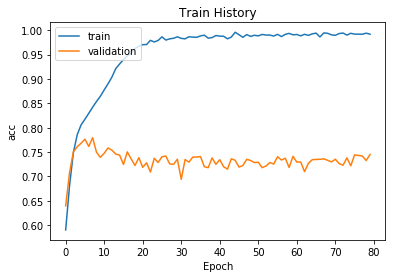

In [2]:
show_plot('acc', train_history_1)

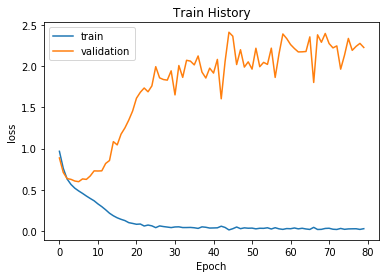

In [3]:
show_plot('loss', train_history_1)

In [5]:
layer_to_visualize(convolution )

NameError: name 'convolution' is not defined

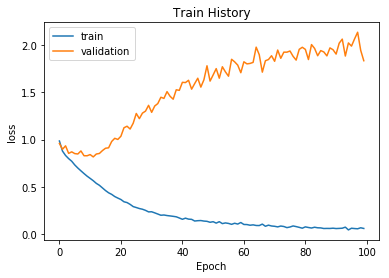

In [3]:
show_plot('loss', train_history_2)

## 9 seconds(overlapping)

In [ ]:
import numpy as np
import wfdb as wf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
np.set_printoptions(suppress=True)

import data_preprocessing as dp
tmp = dp.makeData(9, 0.5, 0.2, 0.3, overlap_dot=1350)
trainD, trainL, v_D, v_L, testD, testL = tmp.main()

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)


model = Sequential() 
model.add(Conv1D(filters = 512, kernel_size = 3, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 100))
model.add(Flatten())
model.add(Dense(4, activation = "softmax"))
print(model.summary())

model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history = model.fit(x = trainData, y = trainLabel, epochs=10, validation_split=0.2, batch_size=100, verbose=2)

print('Finish training!')


import pylab as plt

def history_display(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag):
    if flag == 'acc':
        history_display(train_history, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(train_history, 'loss', 'val_loss')
    else:
        print('Invalid!')
     

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A: 5003
~: 1356
O: 16983
N: 33153
split train data index:  [[0, 2502, 3503, 5003], [5003, 5682, 5954, 6359], [6359, 14851, 18248, 23342], [23342, 39919, 46550, 56495]]
(28250, 2700)
(28250,)
(11301, 2700)
(11301,)
(16944, 2700)
(16944,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2698, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 26, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 53252     
Total params: 55,300
Trainable params: 55,300
Non-trainable params: 0
_________________________________________________________________
None
Train on 22600 samples, vali

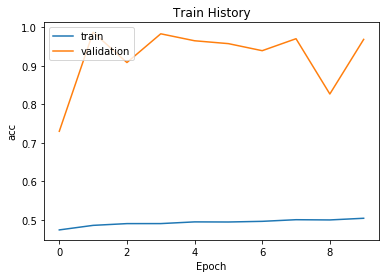

In [2]:
show_plot('acc')

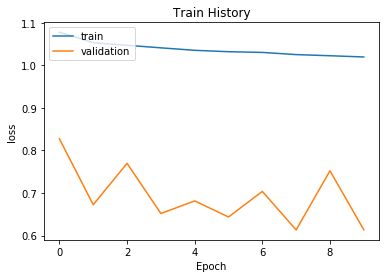

In [3]:
show_plot('loss')

## 30 seconds

In [1]:
import numpy as np
import wfdb as wf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
#from keras.callbacks import Tensorboard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")

with tf.device('/cpu:0'):
    model = Sequential() 
    model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1), activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 32, kernel_size = 7, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
    model.add(Flatten())
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))

print(model.summary())


parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 50
train_history_1 = parallel_model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=100,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*2, 
                          verbose=1)
evaluation = parallel_model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2239, 64)          14400     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1119, 

5078/5078 [==============================] - 3s 595us/step - loss: 0.4441 - acc: 0.8385 - val_loss: 0.5297 - val_acc: 0.7963
Epoch 30/100
5078/5078 [==============================] - 3s 582us/step - loss: 0.4301 - acc: 0.8383 - val_loss: 0.5342 - val_acc: 0.7972
Epoch 31/100
5078/5078 [==============================] - 3s 596us/step - loss: 0.4233 - acc: 0.8444 - val_loss: 0.5424 - val_acc: 0.7992
Epoch 32/100
5078/5078 [==============================] - 3s 581us/step - loss: 0.4004 - acc: 0.8590 - val_loss: 0.5673 - val_acc: 0.7992
Epoch 33/100
5078/5078 [==============================] - 3s 573us/step - loss: 0.4211 - acc: 0.8458 - val_loss: 0.5440 - val_acc: 0.8036
Epoch 34/100
5078/5078 [==============================] - 3s 605us/step - loss: 0.4155 - acc: 0.8472 - val_loss: 0.6078 - val_acc: 0.7928
Epoch 35/100
5078/5078 [==============================] - 3s 578us/step - loss: 0.4000 - acc: 0.8553 - val_loss: 0.5564 - val_acc: 0.8081
Epoch 36/100
5078/5078 [=======================

5078/5078 [==============================] - 3s 583us/step - loss: 0.2240 - acc: 0.9175 - val_loss: 0.7295 - val_acc: 0.8125
Epoch 89/100
5078/5078 [==============================] - 3s 600us/step - loss: 0.2097 - acc: 0.9204 - val_loss: 0.7237 - val_acc: 0.8115
Epoch 90/100
5078/5078 [==============================] - 3s 591us/step - loss: 0.2223 - acc: 0.9181 - val_loss: 0.7659 - val_acc: 0.8095
Epoch 91/100
5078/5078 [==============================] - 3s 575us/step - loss: 0.2187 - acc: 0.9214 - val_loss: 0.6979 - val_acc: 0.8209
Epoch 92/100
5078/5078 [==============================] - 3s 592us/step - loss: 0.2310 - acc: 0.9193 - val_loss: 0.6823 - val_acc: 0.8184
Epoch 93/100
5078/5078 [==============================] - 3s 596us/step - loss: 0.2173 - acc: 0.9202 - val_loss: 0.7718 - val_acc: 0.8115
Epoch 94/100
5078/5078 [==============================] - 3s 597us/step - loss: 0.2224 - acc: 0.9163 - val_loss: 0.7198 - val_acc: 0.8056
Epoch 95/100
5078/5078 [=======================

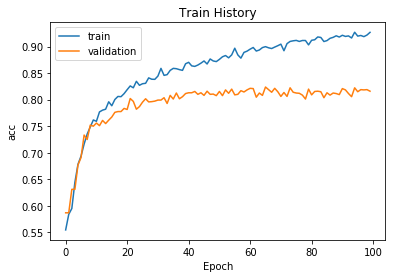

In [3]:
show_plot('acc', train_history_1)

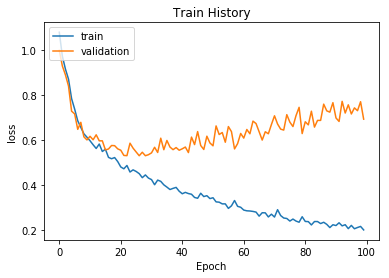

In [4]:
show_plot('loss', train_history_1)

## Check Tensorflow & Keras

In [9]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.3'